# Customer Churn Prediction using SVM(support vector machine)

## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sn

In [4]:
import warnings 
warnings.simplefilter(action='ignore')

## Read Data 

In [63]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3201,3202,15637593,Greco,722,France,Male,20,6,0.00,2,1,0,195486.28,0
9269,9270,15705383,Shen,642,France,Male,35,4,125476.31,1,1,1,91775.51,0
9054,9055,15617476,Manfrin,546,France,Female,30,5,0.00,2,0,1,198543.09,0
4620,4621,15798960,Meng,680,France,Male,33,2,108393.35,1,0,1,39057.67,0
2010,2011,15612050,Castiglione,556,Spain,Female,48,8,168522.37,1,1,1,151310.16,0


## Data Preprocessinng 

### Descriptive Analytics 

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 14)

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [15]:
df.drop(['Surname','RowNumber','CustomerId'],axis=1,inplace=True)

### Handling Null Values 

In [17]:
df.isnull().sum() #df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df=df.drop_duplicates()
df.shape

(10000, 11)

**Here we don't have any null values and duplicate values**

## EDA(Exploratory Data Analysis)

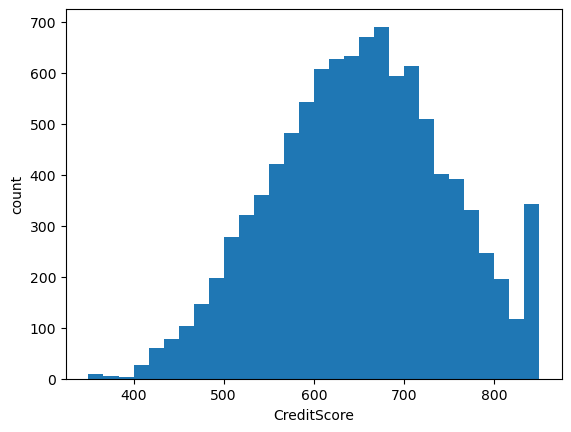

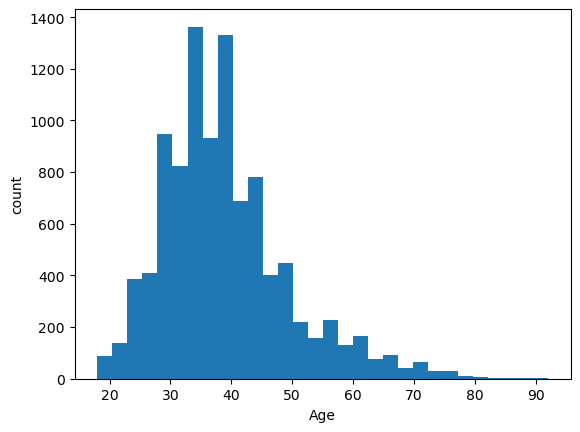

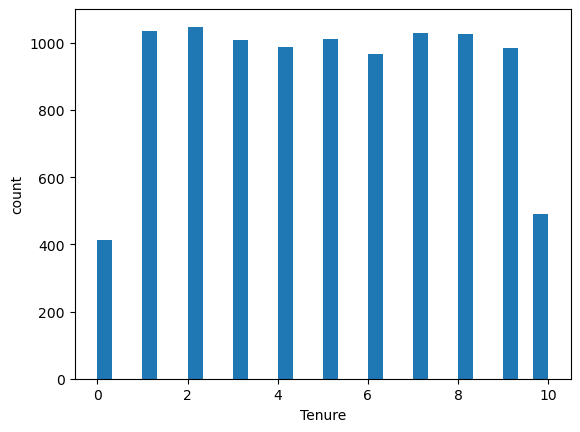

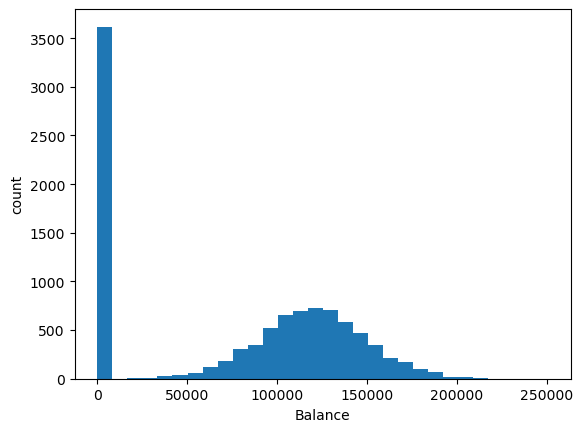

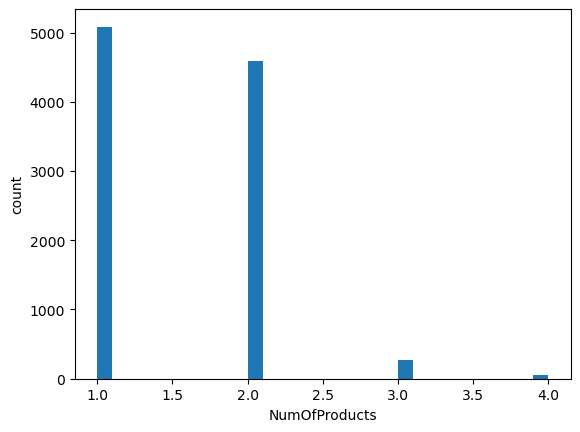

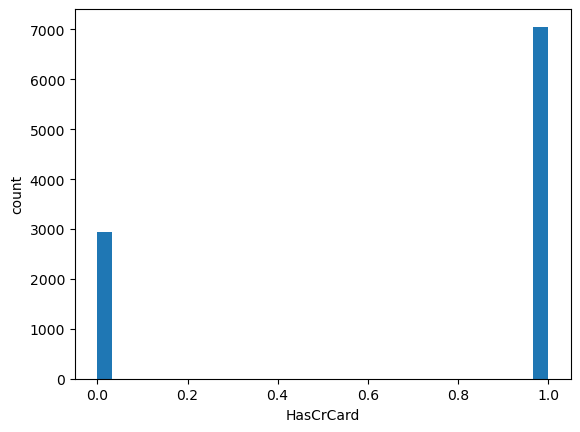

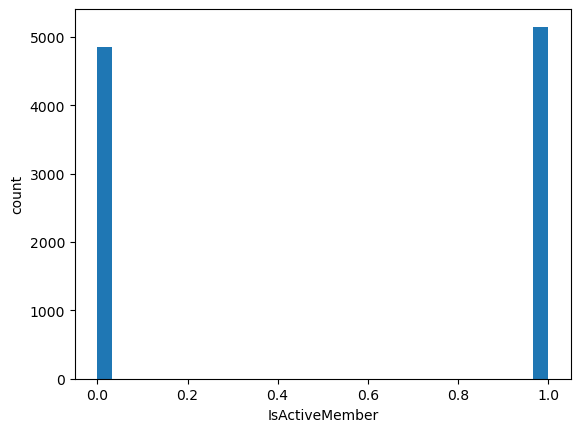

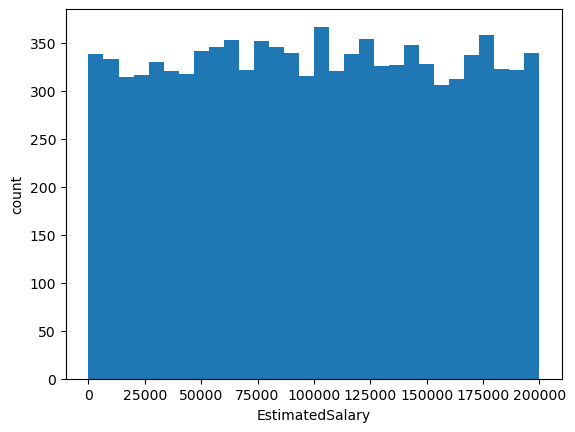

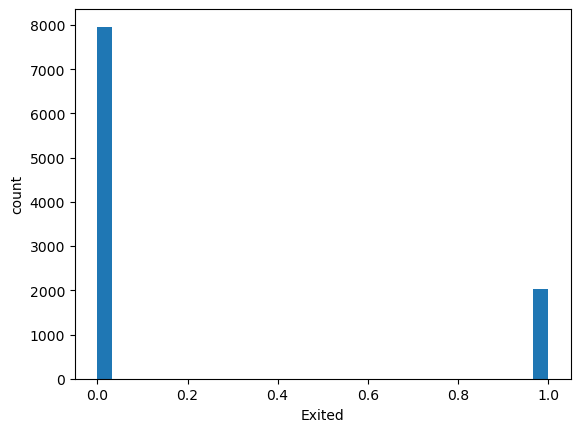

In [21]:
for i in df.select_dtypes(include=['float64','int64']).columns:
    plt.hist(df[i],bins=30)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

<Axes: xlabel='Exited', ylabel='count'>

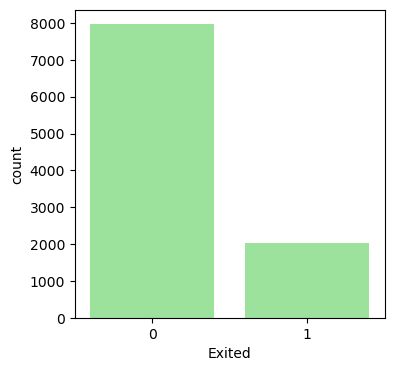

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Exited',color='lightgreen')

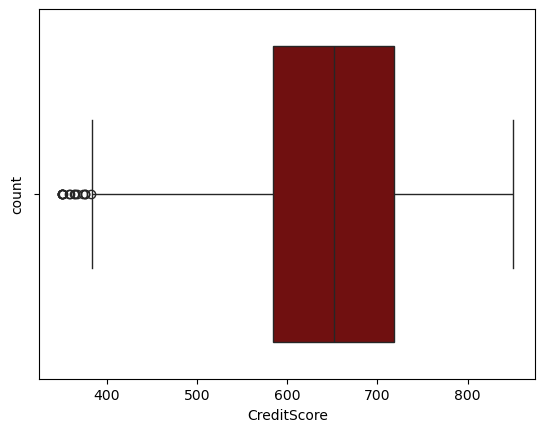

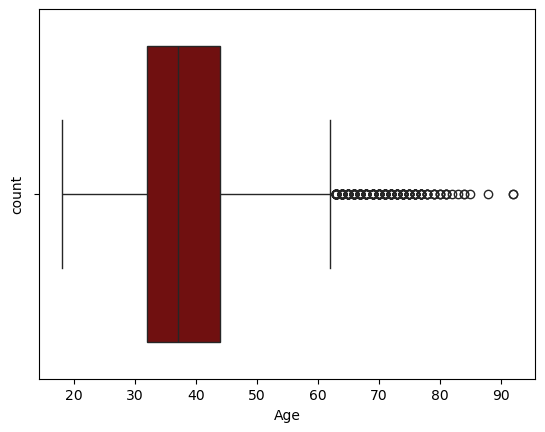

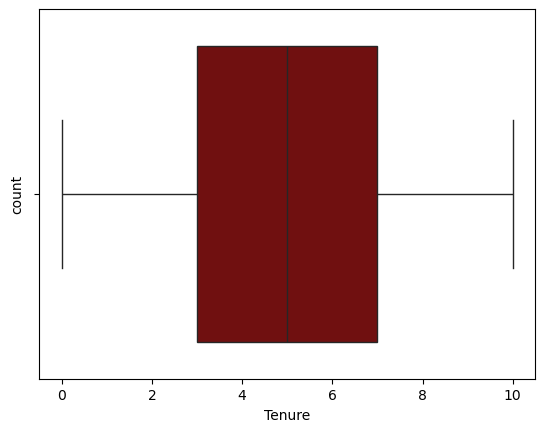

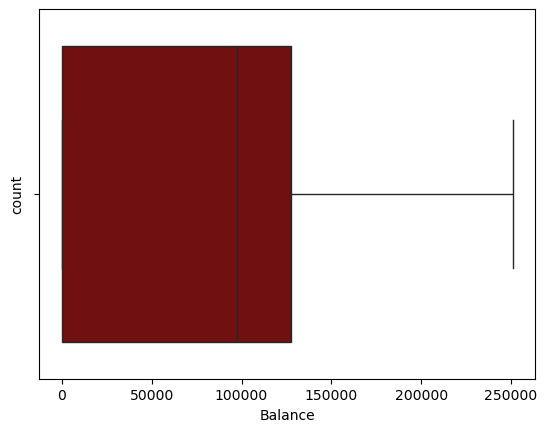

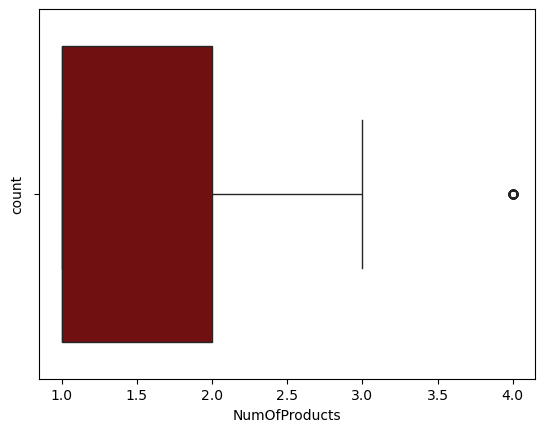

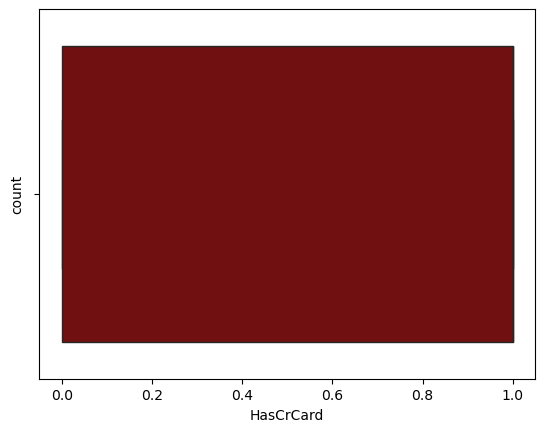

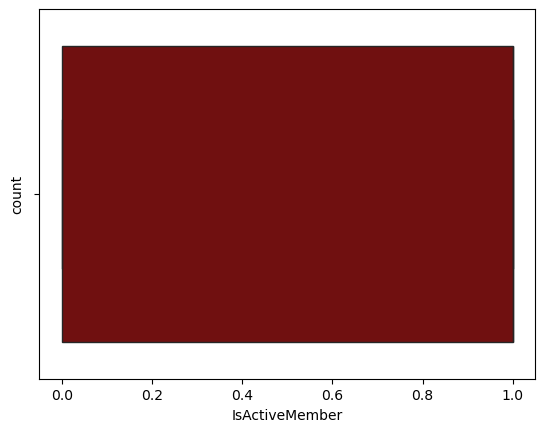

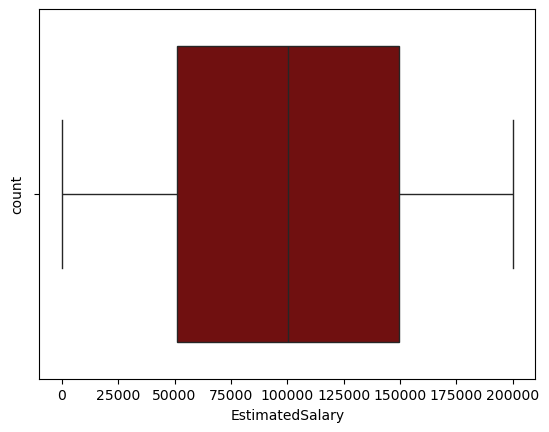

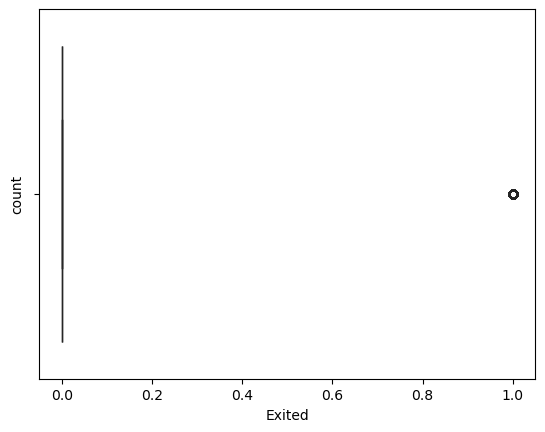

In [23]:
for i in df.select_dtypes(include=['float64','int64']).columns:
    sn.boxplot(data=df,x=i,color='maroon')
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

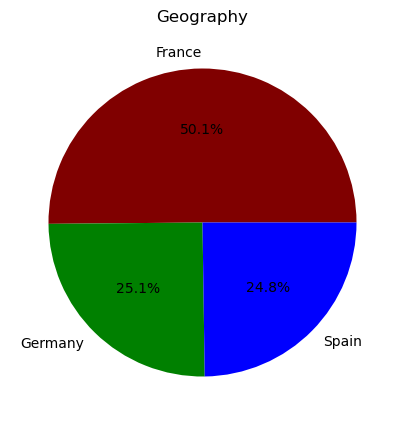

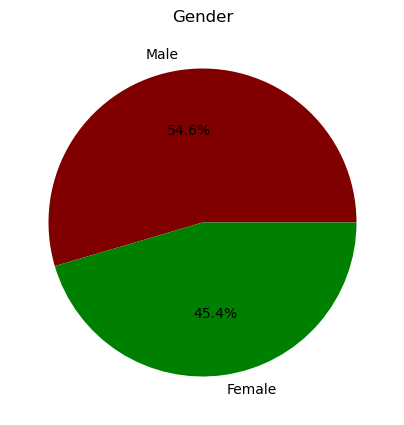

In [24]:
for i in df.select_dtypes(include='object'):
    plt.figure(figsize=(5,5))
    cnt=df[i].value_counts()
    plt.title(i)
    plt.pie(cnt,labels=cnt.index,autopct='%1.1f%%',colors=['maroon','green','blue'])
    plt.show()

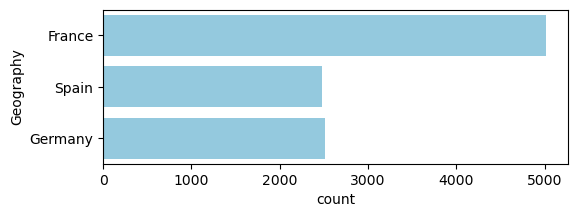

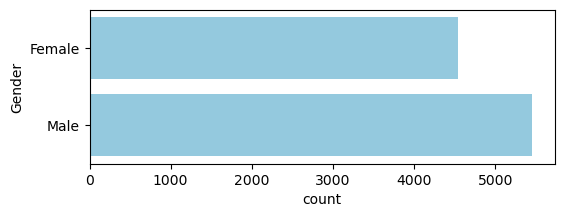

In [25]:
for i in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6,2))
    sn.countplot(y=i,data=df,color='skyblue')
    plt.show()

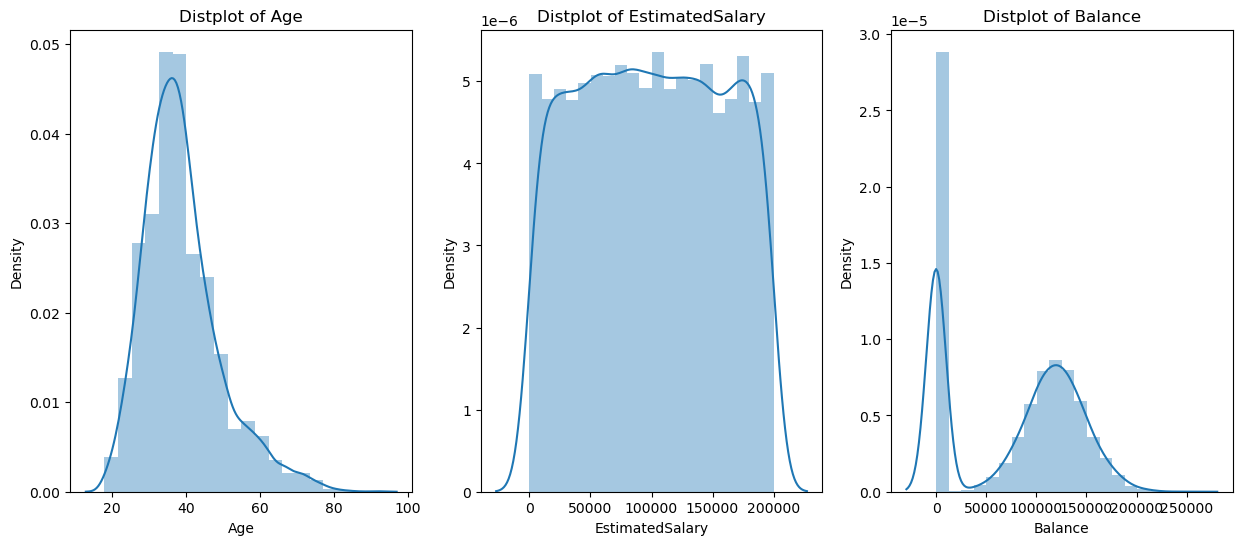

In [26]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','EstimatedSalary','Balance']:
    n+=1
    plt.subplot(1,3,n)
    
    sn.distplot(df[x],bins=20)
    plt.title(f'Distplot of {x}')
plt.show()

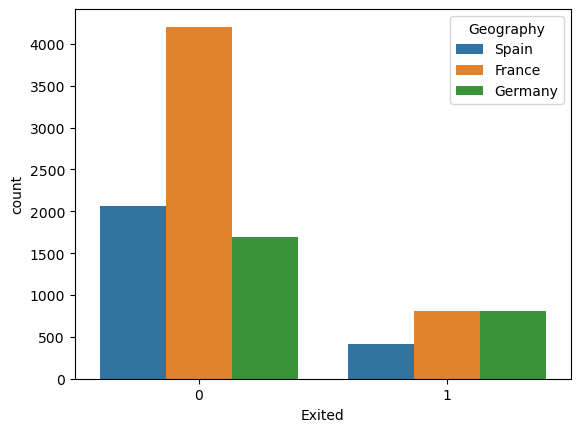

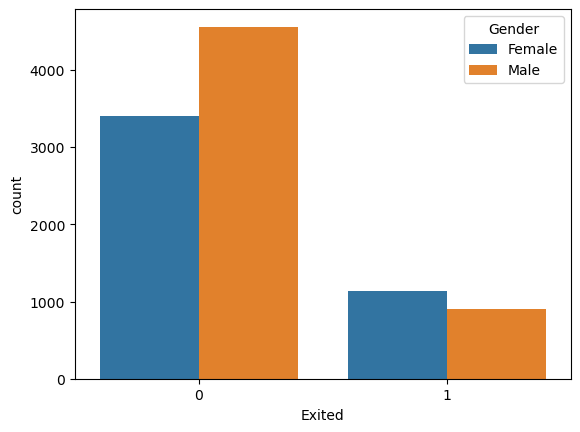

In [27]:
for i in df.select_dtypes(include='object'):
    sn.countplot(data=df,x='Exited',hue=i)
    plt.show()

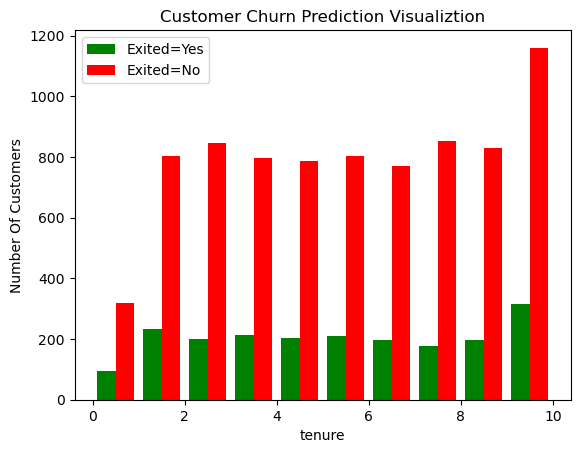

In [28]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

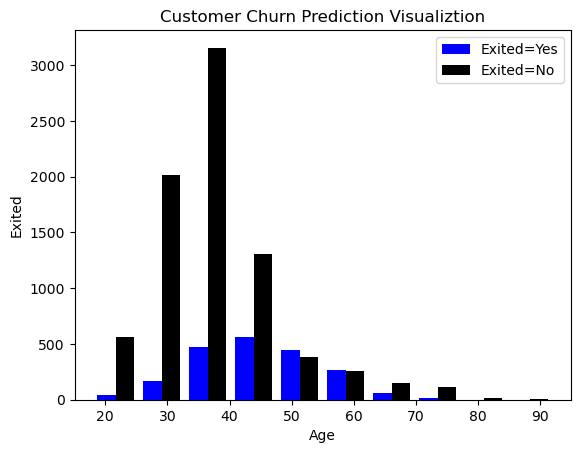

In [29]:
Age_not_Exited = df[df.Exited==0].Age      
Age_Exited = df[df.Exited==1].Age      

plt.xlabel("Age")
plt.ylabel("Exited")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([Age_Exited, Age_not_Exited], color=['blue','black'],label=['Exited=Yes','Exited=No'])
plt.legend()

### Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler 

In [32]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df['Balance'].max()

250898.09

In [67]:
scaler=MinMaxScaler()
col=['Balance','EstimatedSalary','CreditScore']
for i in col:
    df[i]=scaler.fit_transform(df[[i]])
    # df['Balance']=scaler.fit_transform(df[['Balance']])

In [69]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.538,France,Female,42,2,0.000000,1,1,1,0.506735,1
1,2,15647311,Hill,0.516,Spain,Female,41,1,0.334031,1,0,1,0.562709,0
2,3,15619304,Onio,0.304,France,Female,42,8,0.636357,3,1,0,0.569654,1
3,4,15701354,Boni,0.698,France,Female,39,1,0.000000,2,0,0,0.469120,0
4,5,15737888,Mitchell,1.000,Spain,Female,43,2,0.500246,1,1,1,0.395400,0


In [71]:
df['Balance'].max()

1.0

#### One hot encoding 

In [36]:
dummies= pd.get_dummies(df['Geography'],drop_first=True,dtype='int64')
dummies.columns

Index(['Germany', 'Spain'], dtype='object')

In [37]:
df_final=pd.concat([df,dummies],axis=1)

In [38]:
df_final

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,France,Female,42,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,Spain,Female,41,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,France,Female,42,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,France,Female,39,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,Spain,Female,43,2,0.500246,1,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,39,5,0.000000,2,1,0,0.481341,0,0,0
9996,0.332,France,Male,35,10,0.228657,1,1,1,0.508490,0,0,0
9997,0.718,France,Female,36,7,0.000000,1,0,1,0.210390,1,0,0
9998,0.844,Germany,Male,42,3,0.299226,2,1,0,0.464429,1,1,0


In [39]:
df_final['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [40]:
df_final['Gender']=df_final['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [41]:
df_final['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

### Handling imbalance in data 

In [43]:
x=df_final.drop(['Geography','Exited'],axis=1)
y=df_final.Exited

In [44]:
from imblearn.over_sampling import RandomOverSampler , SMOTE
from imblearn.under_sampling import RandomUnderSampler


#### Smote(synthetic miority oversampling technique)

In [46]:
oversample = SMOTE(sampling_strategy='minority')
x_smote, y_smote = oversample.fit_resample(x, y)
print("Oversampled class distribution:", y_smote.shape)

Oversampled class distribution: (15926,)


#### OverSampling  minority class 

In [48]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print("Oversampled class distribution:",y_over.shape)

Oversampled class distribution: (15926,)


#### undersampling Majority class 

In [50]:
'''undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print("Undersampled class distribution:", (y_under.shape))
'''

Undersampled class distribution: (4074,)


### Train test split

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=5)

In [53]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12740, 11), (3186, 11), (12740,), (3186,))

### Model Building using Support Vector Machine 

In [55]:
from sklearn.svm import SVC
model=SVC()

model.fit(x_train,y_train)

SVC()

In [56]:
model.score(x_test, y_test)

0.7322661644695543

In [57]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Model Evaluation

In [59]:
y_test=np.array(y_test)

#### Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix

In [79]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1232,  359],
       [ 494, 1101]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted')

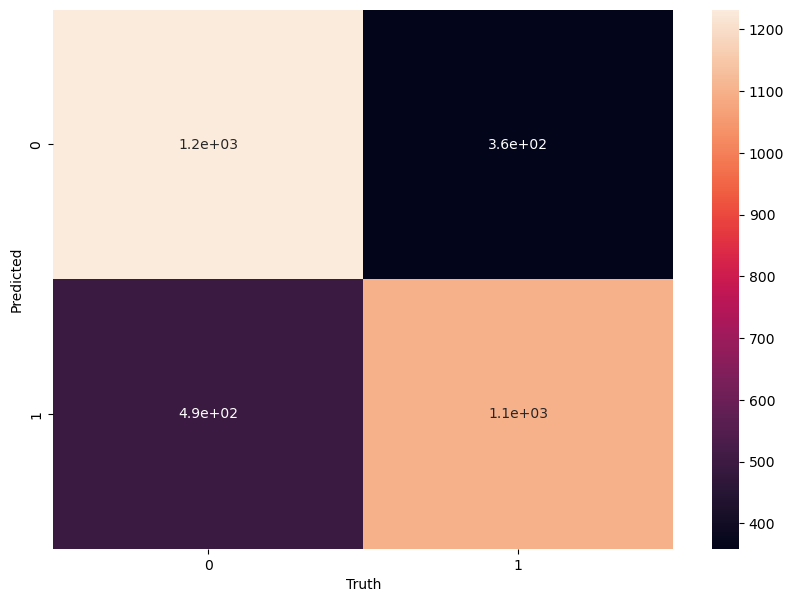

In [75]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')